## 作业1：
#### 下载www数据
#### 构建networkx的网络对象g（提示：有向网络）
#### 将www数据添加到g当中
#### 计算网络中的节点数量和链接数量

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [16]:
g=nx.DiGraph()
with open ('/Users/lisa/Desktop/www.dat.gz.txt') as f:
    for line in f:
        x,y = line.rstrip().split(' ')
        g.add_edge(x,y)

In [17]:
nx.info(g)

'Name: \nType: DiGraph\nNumber of nodes: 325729\nNumber of edges: 1497134\nAverage in degree:   4.5963\nAverage out degree:   4.5963'

KeyboardInterrupt: 

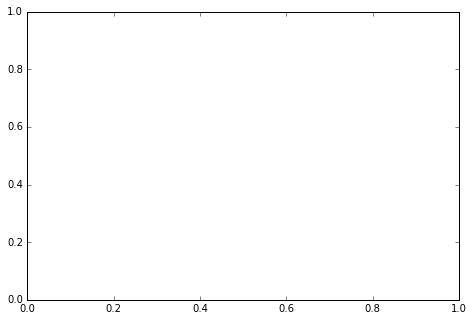

In [35]:
nx.draw(g, with_labels = True)

In [ ]:
#打不出来放弃了  ＝ ＝

In [18]:
nx.density(g)

1.4110719364589702e-05

## 作业2：
#### 阅读 Barabasi (1999) Internet Diameter of the world wide web.Nature.401
#### 绘制www网络的出度分布、入度分布
#### 使用BA模型生成节点数为N、幂指数为γ的网络
#### 计算平均路径长度d与节点数量的关系

In [23]:
#绘制www网络的出度分布、入度分布
inde = nx.in_degree_centrality(g)
outde= nx.out_degree_centrality(g)

In [24]:

# plot degree correlation  
from collections import defaultdict
import numpy as np

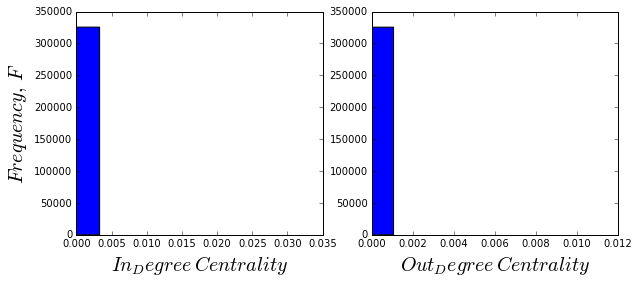

In [26]:
fig = plt.figure(figsize=(15, 4),facecolor='white')
ax = plt.subplot(1, 3, 1)
plt.hist(inde.values(), bins = 10)  #bin分类
plt.xlabel('$In_Degree \, Centrality$', fontsize = 20)
plt.ylabel('$Frequency, \, F$', fontsize = 20)

ax = plt.subplot(1, 3, 2)
plt.hist(outde.values(), bins = 10)
plt.xlabel('$Out_Degree \, Centrality$', fontsize = 20)

plt.show()

In [28]:
from collections import defaultdict
import numpy as np

def plotDegreeDistribution(g):
    degs = defaultdict(int)
    for i in g.inde().values(): degs[i]+=1
    items = sorted ( degs.items () )
    x, y = np.array(items).T
    plt.plot(x, y, 'b-o')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(['Degree'])
    plt.xlabel('$K$', fontsize = 20)
    plt.ylabel('$P_K$', fontsize = 20)
    plt.title('$In_Degree\,Distribution$', fontsize = 20)
    plt.show()   
    


In [30]:
import networkx as nx
import matplotlib.pyplot as plt

In [31]:
Ns = [i*10 for i in [1, 10, 100, 1000]]
ds = []
for N in Ns:
    print N
    BA= nx.random_graphs.barabasi_albert_graph(N,2)
    d = nx.average_shortest_path_length(BA)
    ds.append(d)

10
100
1000
10000


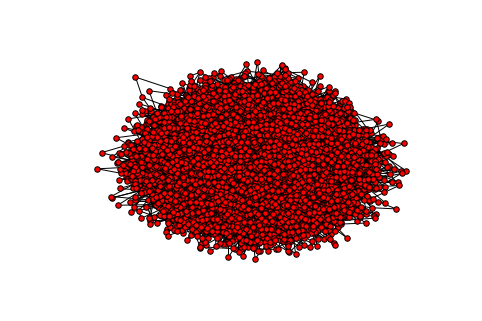

In [34]:
pos = nx.spring_layout(BA)          #定义一个布局，此处采用了spring布局方式
nx.draw(BA,pos,with_labels=False,node_size = 30)  #绘制图形
plt.show()

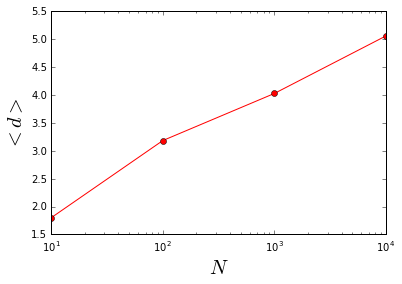

In [32]:
plt.plot(Ns, ds, 'r-o')
plt.xlabel('$N$', fontsize = 20)
plt.ylabel('$<d>$', fontsize = 20)
plt.xscale('log')
plt.show()